# Topic Modelling 

In [0]:
import pandas as pd
import numpy as np
import spacy
import gensim
import nltk
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns

from gensim.utils import simple_preprocess
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import pickle
import warnings
warnings.filterwarnings("ignore")

C:\Users\Jing Ying\Documents\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [0]:
df = pd.read_csv('C:/Users/Jing Ying/Documents/Y3S1/BT4222/Final Project/Hotel_Reviews.csv')
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


## 1. Data Preprocessing

### 1.1 Dataframe

In [0]:
# check for duplicated reviews
sum(df.duplicated())

526

In [0]:
# remove duplicates
cleaned_df = df.drop_duplicates()

In [0]:
# check for missing values
cleaned_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                            True
lng                                            True
dtype: bool

In [0]:
# get addresses of hotels with missing lat and lng values
null_df = cleaned_df[cleaned_df.isnull().any(axis=1)]
null_df['Hotel_Address'].unique()

array(['20 Rue De La Ga t 14th arr 75014 Paris France',
       '23 Rue Damr mont 18th arr 75018 Paris France',
       '4 rue de la P pini re 8th arr 75008 Paris France',
       'Bail n 4 6 Eixample 08010 Barcelona Spain',
       'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria',
       'Hasenauerstra e 12 19 D bling 1190 Vienna Austria',
       'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria',
       'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria',
       'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria',
       'Paragonstra e 1 11 Simmering 1110 Vienna Austria',
       'Pau Clar s 122 Eixample 08009 Barcelona Spain',
       'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria',
       'Sep lveda 180 Eixample 08011 Barcelona Spain',
       'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria',
       'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria',
       'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria',
       'W hringer Stra e 33 35 09 Als

In [0]:
# get missing lat and lng values from addresses using https://www.latlong.net/
missing_lat = {'20 Rue De La Ga t 14th arr 75014 Paris France': 48.831928,
               '23 Rue Damr mont 18th arr 75018 Paris France': 48.887711,
               '4 rue de la P pini re 8th arr 75008 Paris France': 48.897881,
               'Bail n 4 6 Eixample 08010 Barcelona Spain': 41.326160,
               'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria': 48.224480,
               'Hasenauerstra e 12 19 D bling 1190 Vienna Austria': 48.253330,
               'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria': 48.222309,
               'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria': 48.254639,
               'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria': 48.217190,
               'Paragonstra e 1 11 Simmering 1110 Vienna Austria': 48.163448,
               'Pau Clar s 122 Eixample 08009 Barcelona Spain': 41.392761,
               'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria': 48.210091,
               'Sep lveda 180 Eixample 08011 Barcelona Spain': 41.384811,
               'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria': 48.252640,
               'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria': 48.224590,
               'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria': 48.222309,
               'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria': 48.220299}

missing_lng = {'20 Rue De La Ga t 14th arr 75014 Paris France': 2.335140,
               '23 Rue Damr mont 18th arr 75018 Paris France': 2.341540,
               '4 rue de la P pini re 8th arr 75008 Paris France': 2.323460,
               'Bail n 4 6 Eixample 08010 Barcelona Spain': 2.143110,
               'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria': 16.354000,
               'Hasenauerstra e 12 19 D bling 1190 Vienna Austria': 16.339180,
               'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria': 16.351561,
               'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria': 16.442841,
               'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria': 16.388350,
               'Paragonstra e 1 11 Simmering 1110 Vienna Austria': 16.472561,
               'Pau Clar s 122 Eixample 08009 Barcelona Spain': 2.167240,
               'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria': 16.287680,
               'Sep lveda 180 Eixample 08011 Barcelona Spain': 2.161800,
               'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria': 16.338369,
               'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria': 16.384640,
               'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria': 16.351561,
               'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria': 16.355850}

In [0]:
# fill missing lat and lng values
cleaned_df['lat'] = cleaned_df['lat'].fillna(cleaned_df['Hotel_Address'].apply(lambda x: missing_lat.get(x)))
cleaned_df['lng'] = cleaned_df['lng'].fillna(cleaned_df['Hotel_Address'].apply(lambda x: missing_lng.get(x)))
cleaned_df.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                           False
lng                                           False
dtype: bool

### 1.2 Reviews

In [0]:
nlp = spacy.load('en', disable=['parser','ner'])

def lemmatization(text_data, tags=['NOUN','ADJ','VERB','ADV']):
    '''
    parameters:
        text_data: tokenised text data to perform lemmatization on (list string)
        tags: POS tags to keep, default = 'NOUN','ADJ','VERB','ADV' (list string)
    returns:
        lemmatized text data (list string)
    '''
    result = []
    for text in text_data:
        doc = nlp(" ".join(text)) 
        result.append([token.lemma_ for token in doc if token.pos_ in tags])
    return result

In [0]:
def clean_data(text_data):
    '''
    parameters:
        text_data: tokenised text data to perform cleaning on (list string)
    returns:
        cleaned text data - lowercase, tokenised, stop words removed, lemmatized, short words removed (list string)
    '''
    # convert all words to lowercase and tokenise
    text_data = [simple_preprocess(text, deacc=True) for text in text_data]

    # remove stop words
    stop_words = stopwords.words('english')
    text_data = [[token for token in text if token not in stop_words] for text in text_data]

    # lemmatization
    text_data = lemmatization(text_data)

    # remove short words (length < 3)
    text_data = [[token for token in text if len(token)>2] for text in text_data]

    return text_data

In [0]:
# get 3 sets of reviews: postive, negative and all reviews
pos_reviews = cleaned_df['Positive_Review'].values.tolist()
neg_reviews = cleaned_df['Negative_Review'].values.tolist()
all_reviews = pos_reviews+neg_reviews

In [0]:
# clean lists of reviews
#pos_reviews = clean_data(pos_reviews)
#neg_reviews = clean_data(neg_reviews)
#all_reviews = clean_data(all_reviews)

In [0]:
# pickle review lists
#with open('pos_reviews', 'wb') as f:
#    pickle.dump(pos_reviews, f)

#with open('neg_reviews', 'wb') as f:
#    pickle.dump(neg_reviews, f)

#with open('all_reviews', 'wb') as f:
#    pickle.dump(all_reviews, f)

In [0]:
# retrieve review lists using pickle
pos_reviews = pickle.load(open('pos_reviews', 'rb'))
neg_reviews = pickle.load(open('neg_reviews', 'rb'))
all_reviews = pickle.load(open('all_reviews', 'rb'))

## 2. Topic Modelling

In [0]:
def prepare_dict_corpus(text_data):
    '''
    parameters:
        text_data: text data to build dictionary and corpus from
    returns:
        dictionary and corpus for topic modelling
    '''
    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    return dictionary, corpus

In [0]:
def compute_coherence_values(dictionary, corpus, text_data, start, stop, step):
    '''
    parameters:
        dictionary: gensim dictionary
        corpus: gensim corpus
        text_data: text data to perform topic modelling on
        start: starting number of topics
        stop: maximum number of topics
        step: number of topics to jump by
    returns:
        model_list: list of all LDA models built
        coherence_values: coherence values for each corresponding LDA model with different number of topics
    '''
    model_list = []
    coherence_values = []
    for num_topics in range(start,stop,step):
        model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=100,
                         chunksize=100,
                         passes=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=text_data, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

In [0]:
# model parameters
START = 2
STOP = 11
STEP = 1

### 2.1 Positive Reviews

#### Prepare Dictionary and Corpus

In [0]:
pos_dict, pos_corp = prepare_dict_corpus(pos_reviews)

#### Find Optimum Number of Topics

In [0]:
pos_model_list, pos_coherence_values = compute_coherence_values(dictionary=pos_dict,
                                                                corpus=pos_corp,
                                                                text_data=pos_reviews,
                                                                start=START,
                                                                stop=STOP,
                                                                step=STEP)

In [0]:
# get model with optimum number of topics
POS_LDA_MODEL = pos_model_list[0]
POS_NUM_TOPICS = START
POS_COHERENCE_VALUE = 0

for model_num, num_topics, coherence_value in zip(range(len(pos_model_list)), range(START,STOP,STEP), pos_coherence_values):
    print("Model: ",model_num," No. of Topics: ",num_topics," Coherence Value: ",coherence_value)
    
    if coherence_value>POS_COHERENCE_VALUE:
        POS_LDA_MODEL = pos_model_list[model_num]
        POS_NUM_TOPICS = num_topics
        POS_COHERENCE_VALUE = coherence_value

Model:  0  No. of Topics:  2  Coherence Value:  0.5876592621893694
Model:  1  No. of Topics:  3  Coherence Value:  0.6275366976194666
Model:  2  No. of Topics:  4  Coherence Value:  0.6349082491418278
Model:  3  No. of Topics:  5  Coherence Value:  0.6455241630001272
Model:  4  No. of Topics:  6  Coherence Value:  0.6493554021907139
Model:  5  No. of Topics:  7  Coherence Value:  0.6373554706604672
Model:  6  No. of Topics:  8  Coherence Value:  0.6527185015616707
Model:  7  No. of Topics:  9  Coherence Value:  0.6316481211064184
Model:  8  No. of Topics:  10  Coherence Value:  0.6494706173480835


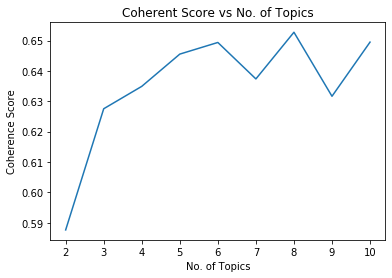

In [0]:
# visualise no. of topics and their corresponding coherence scores
plt.plot(range(START,STOP,STEP), pos_coherence_values)
plt.title('Coherent Score vs No. of Topics')
plt.xlabel('No. of Topics')
plt.ylabel('Coherence Score')
plt.show()

#### Find Topics and Related Keywords

In [0]:
# find weightage and keywords for each topic
POS_LDA_MODEL.print_topics()

[(0,
  '0.075*"close" + 0.044*"area" + 0.042*"location" + 0.035*"quiet" + 0.032*"restaurant" + 0.032*"modern" + 0.032*"bar" + 0.029*"easy" + 0.025*"hotel" + 0.025*"great"'),
 (1,
  '0.223*"good" + 0.188*"location" + 0.127*"breakfast" + 0.090*"great" + 0.024*"nice" + 0.022*"value" + 0.018*"hotel" + 0.017*"food" + 0.017*"money" + 0.016*"service"'),
 (2,
  '0.055*"room" + 0.042*"price" + 0.029*"polite" + 0.021*"overall" + 0.021*"pleasant" + 0.020*"give" + 0.016*"include" + 0.015*"pool" + 0.014*"leave" + 0.014*"bedroom"'),
 (3,
  '0.199*"room" + 0.131*"clean" + 0.112*"comfortable" + 0.091*"positive" + 0.078*"bed" + 0.040*"nice" + 0.030*"spacious" + 0.028*"bathroom" + 0.028*"big" + 0.023*"large"'),
 (4,
  '0.268*"staff" + 0.129*"friendly" + 0.101*"helpful" + 0.061*"location" + 0.047*"great" + 0.038*"room" + 0.029*"lovely" + 0.027*"amazing" + 0.021*"nice" + 0.018*"hotel"'),
 (5,
  '0.083*"station" + 0.050*"breakfast" + 0.050*"room" + 0.028*"love" + 0.027*"free" + 0.025*"central" + 0.025*"lot

In [0]:
# get table of topics and keywords
pos_topic_words_dict = {}
for i in range(POS_NUM_TOPICS):
    words = POS_LDA_MODEL.show_topic(i, topn=10)
    pos_topic_words_dict['Topic '+'%d'%(i+1)] = [topic[0] for topic in words]

pos_topic_words_df = pd.DataFrame(pos_topic_words_dict)
pos_topic_words_df = pos_topic_words_df.rename(index={0:'Word 1', 1:'Word 2', 2:'Word 3', 3:'Word 4', 4:'Word 5',
                                                      5:'Word 6', 6:'Word 7', 7:'Word 8', 8:'Word 9', 9:'Word 10',})
pos_topic_words_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
Word 1,close,good,room,room,staff,station,walk,excellent
Word 2,area,location,price,clean,friendly,breakfast,perfect,hotel
Word 3,location,breakfast,polite,comfortable,helpful,room,hotel,stay
Word 4,quiet,great,overall,positive,location,love,minute,facility
Word 5,restaurant,nice,pleasant,bed,great,free,place,service
Word 6,modern,value,give,nice,room,central,get,check
Word 7,bar,hotel,include,spacious,lovely,lot,view,make
Word 8,easy,food,pool,bathroom,amazing,day,time,recommend
Word 9,hotel,money,leave,big,nice,convenient,small,feel
Word 10,great,service,bedroom,large,hotel,coffee,city,definitely


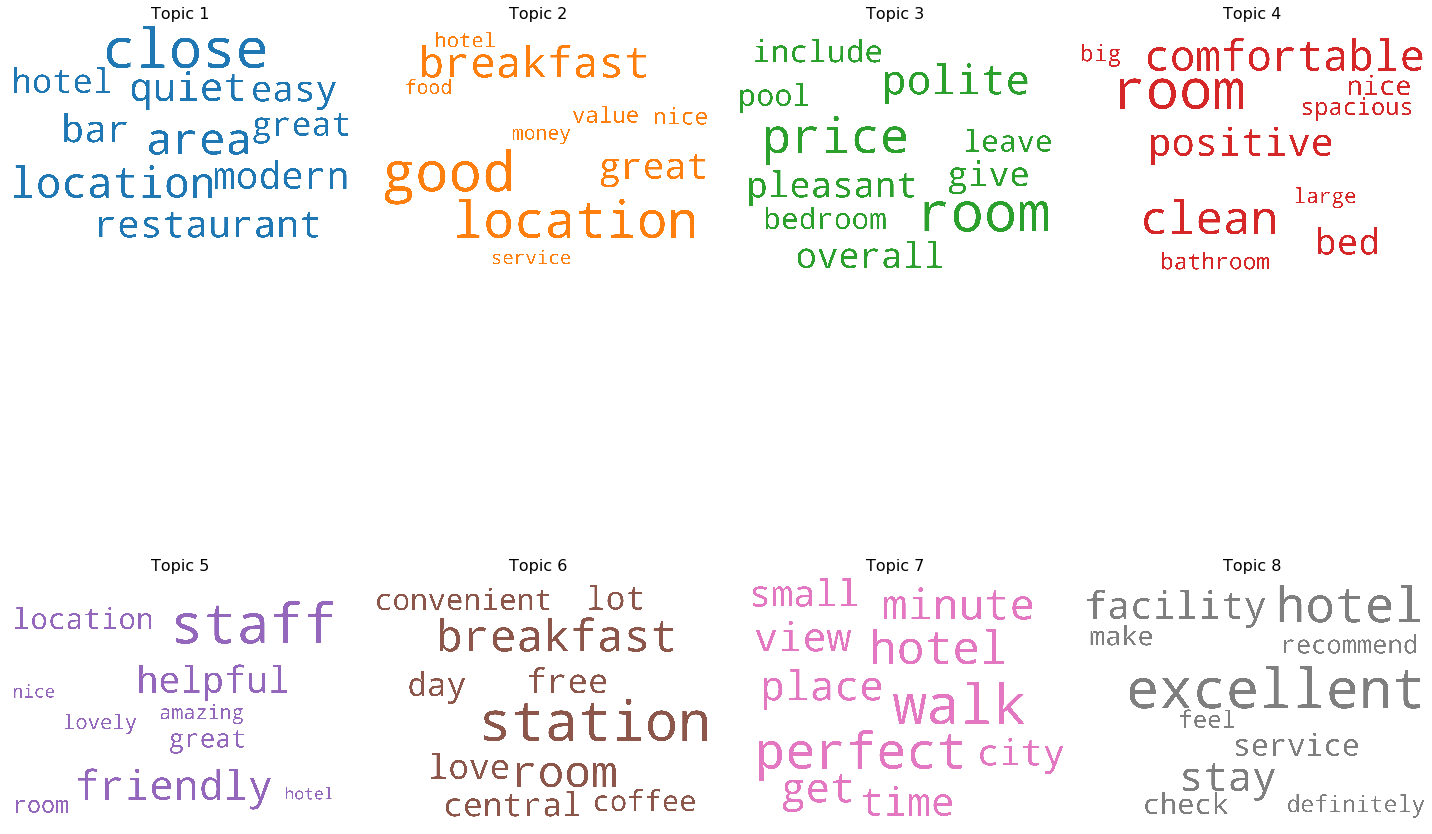

In [0]:
# word cloud for each topic and related keywords
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

pos_cloud = WordCloud(background_color='white',
                      width=3000,
                      height=2500,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

topics = POS_LDA_MODEL.show_topics(num_words=10, formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### 2.2 Negative Reviews

#### Prepare Dictionary and Corpus

In [0]:
neg_dict, neg_corp = prepare_dict_corpus(neg_reviews)

#### Find Optimum Number of Topics

In [0]:
neg_model_list, neg_coherence_values = compute_coherence_values(dictionary=neg_dict,
                                                                corpus=neg_corp,
                                                                text_data=neg_reviews,
                                                                start=START,
                                                                stop=STOP,
                                                                step=STEP)

In [0]:
# get model with optimum number of topics
NEG_LDA_MODEL = neg_model_list[0]
NEG_NUM_TOPICS = START
NEG_COHERENCE_VALUE = 0

for model_num, num_topics, coherence_value in zip(range(len(neg_model_list)), range(START,STOP,STEP), neg_coherence_values):
    print("Model: ",model_num," No. of Topics: ",num_topics," Coherence Value: ",coherence_value)
    
    if coherence_value>NEG_COHERENCE_VALUE:
        NEG_LDA_MODEL = neg_model_list[model_num]
        NEG_NUM_TOPICS = num_topics
        NEG_COHERENCE_VALUE = coherence_value

Model:  0  No. of Topics:  2  Coherence Value:  0.7149368373798798
Model:  1  No. of Topics:  3  Coherence Value:  0.7167136626681878
Model:  2  No. of Topics:  4  Coherence Value:  0.6990247570760864
Model:  3  No. of Topics:  5  Coherence Value:  0.7202632910554417
Model:  4  No. of Topics:  6  Coherence Value:  0.7298049896264756
Model:  5  No. of Topics:  7  Coherence Value:  0.7279457462482493
Model:  6  No. of Topics:  8  Coherence Value:  0.7409538624833069
Model:  7  No. of Topics:  9  Coherence Value:  0.7327293276342197
Model:  8  No. of Topics:  10  Coherence Value:  0.7238097133176886


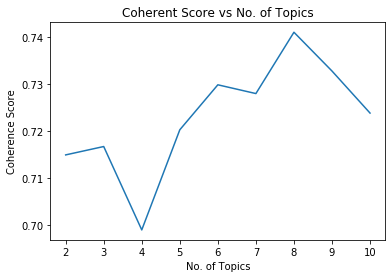

In [0]:
# visualise no. of topics and their corresponding coherence scores
plt.plot(range(START,STOP,STEP), neg_coherence_values)
plt.title('Coherent Score vs No. of Topics')
plt.xlabel('No. of Topics')
plt.ylabel('Coherence Score')
plt.show()

#### Find Topics and Related Keywords

In [0]:
# find weightage and keywords for each topic
NEG_LDA_MODEL.print_topics()

[(0,
  '0.065*"room" + 0.045*"hotel" + 0.032*"stay" + 0.029*"book" + 0.025*"day" + 0.021*"reception" + 0.020*"give" + 0.020*"night" + 0.018*"bed" + 0.016*"facility"'),
 (1,
  '0.519*"negative" + 0.036*"location" + 0.032*"lift" + 0.024*"car" + 0.013*"pound" + 0.013*"case" + 0.012*"bottle" + 0.012*"none" + 0.011*"consider" + 0.011*"min"'),
 (2,
  '0.058*"little" + 0.038*"hotel" + 0.033*"area" + 0.032*"well" + 0.023*"great" + 0.020*"look" + 0.019*"much" + 0.019*"far" + 0.018*"better" + 0.017*"walk"'),
 (3,
  '0.055*"staff" + 0.041*"room" + 0.031*"check" + 0.021*"time" + 0.020*"service" + 0.018*"coffee" + 0.016*"take" + 0.015*"morning" + 0.014*"come" + 0.014*"tea"'),
 (4,
  '0.094*"breakfast" + 0.039*"price" + 0.032*"hotel" + 0.029*"good" + 0.028*"poor" + 0.027*"expensive" + 0.024*"pool" + 0.020*"food" + 0.019*"free" + 0.017*"bar"'),
 (5,
  '0.049*"really" + 0.042*"quite" + 0.033*"big" + 0.032*"cold" + 0.029*"need" + 0.023*"uncomfortable" + 0.016*"bed" + 0.015*"use" + 0.014*"warm" + 0.013*

In [0]:
# get table of topics and keywords
neg_topic_words_dict = {}
for i in range(NEG_NUM_TOPICS):
    words = NEG_LDA_MODEL.show_topic(i, topn=10)
    neg_topic_words_dict['Topic '+'%d'%(i+1)] = [topic[0] for topic in words]

neg_topic_words_df = pd.DataFrame(neg_topic_words_dict)
neg_topic_words_df = neg_topic_words_df.rename(index={0:'Word 1', 1:'Word 2', 2:'Word 3', 3:'Word 4', 4:'Word 5',
                                                      5:'Word 6', 6:'Word 7', 7:'Word 8', 8:'Word 9', 9:'Word 10'})
neg_topic_words_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
Word 1,room,negative,little,staff,breakfast,really,bit,room
Word 2,hotel,location,hotel,room,price,quite,charge,small
Word 3,stay,lift,area,check,hotel,big,extra,bathroom
Word 4,book,car,well,time,good,cold,pay,bed
Word 5,day,pound,great,service,poor,need,light,clean
Word 6,reception,case,look,coffee,expensive,uncomfortable,think,work
Word 7,give,bottle,much,take,pool,bed,use,shower
Word 8,night,none,far,morning,food,use,thing,door
Word 9,bed,consider,better,come,free,warm,card,floor
Word 10,facility,min,walk,tea,bar,sink,executive,window


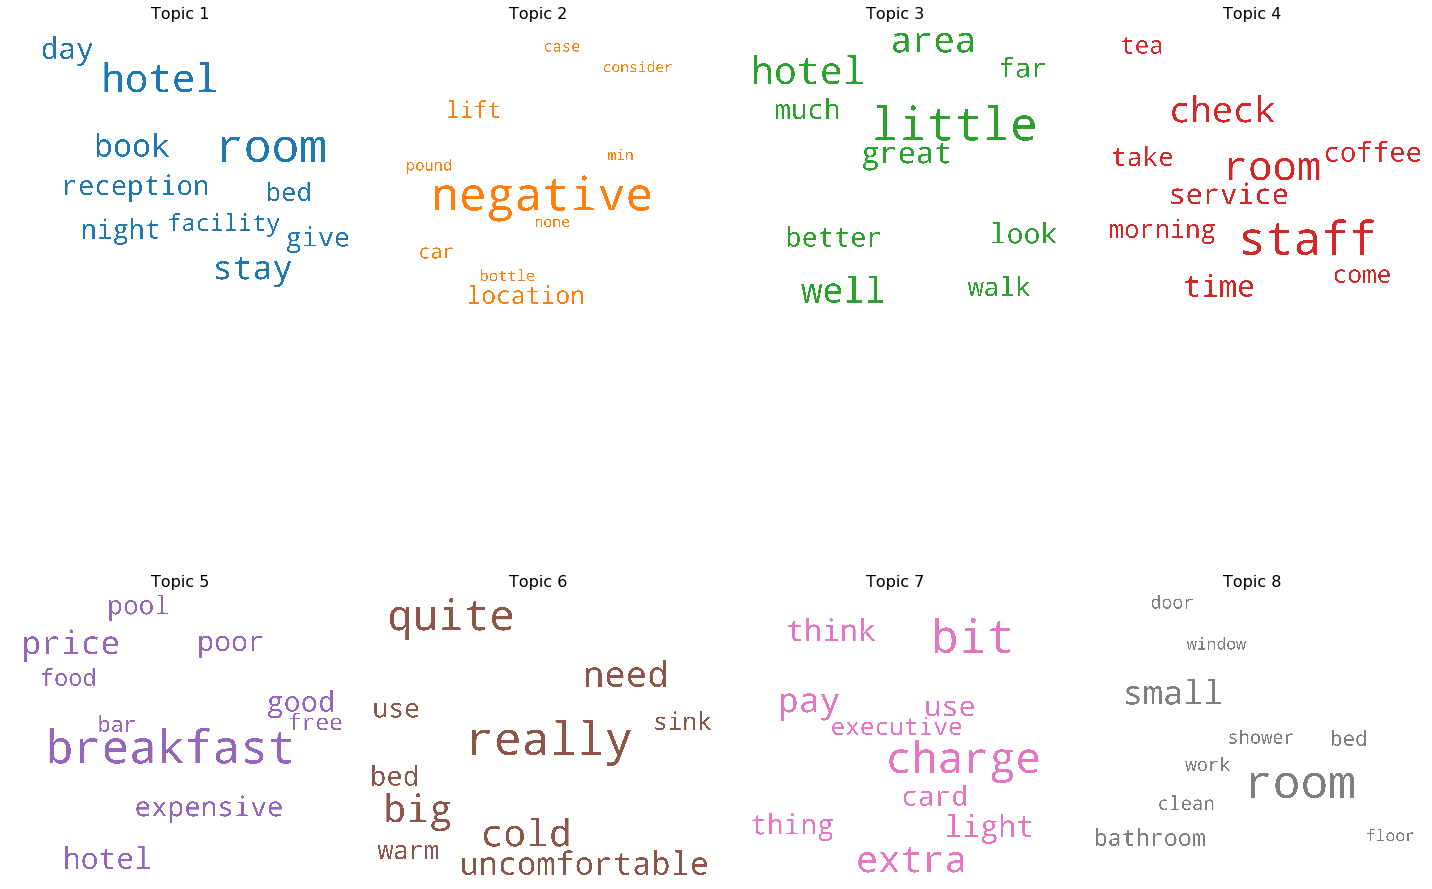

In [0]:
# word cloud for each topic and related keywords
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

neg_cloud = WordCloud(background_color='white',
                      width=3000,
                      height=2500,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

topics = NEG_LDA_MODEL.show_topics(num_words=10, formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    neg_cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(neg_cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()